# Interactive Dashboard
This notebook creates various visualizations and interactive plots.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Generate sample data for dashboard
np.random.seed(42)
n_points = 1000

data = {
    'revenue': np.random.exponential(1000, n_points),
    'customers': np.random.poisson(50, n_points),
    'satisfaction': np.random.beta(8, 2, n_points) * 10,
    'category': np.random.choice(['A', 'B', 'C', 'D'], n_points),
    'month': np.random.choice(range(1, 13), n_points)
}

df = pd.DataFrame(data)
print("Dashboard Data Overview:")
print(df.head())
print(f"\nDataset shape: {df.shape}")

Dashboard Data Overview:
       revenue  customers  satisfaction category  month
0   469.268090         43      9.629570        D      7
1  3010.121431         59      9.609262        D     11
2  1316.745694         57      8.813642        A      5
3   912.942554         54      8.036520        D      5
4   169.624870         44      7.936700        A      7

Dataset shape: (1000, 5)


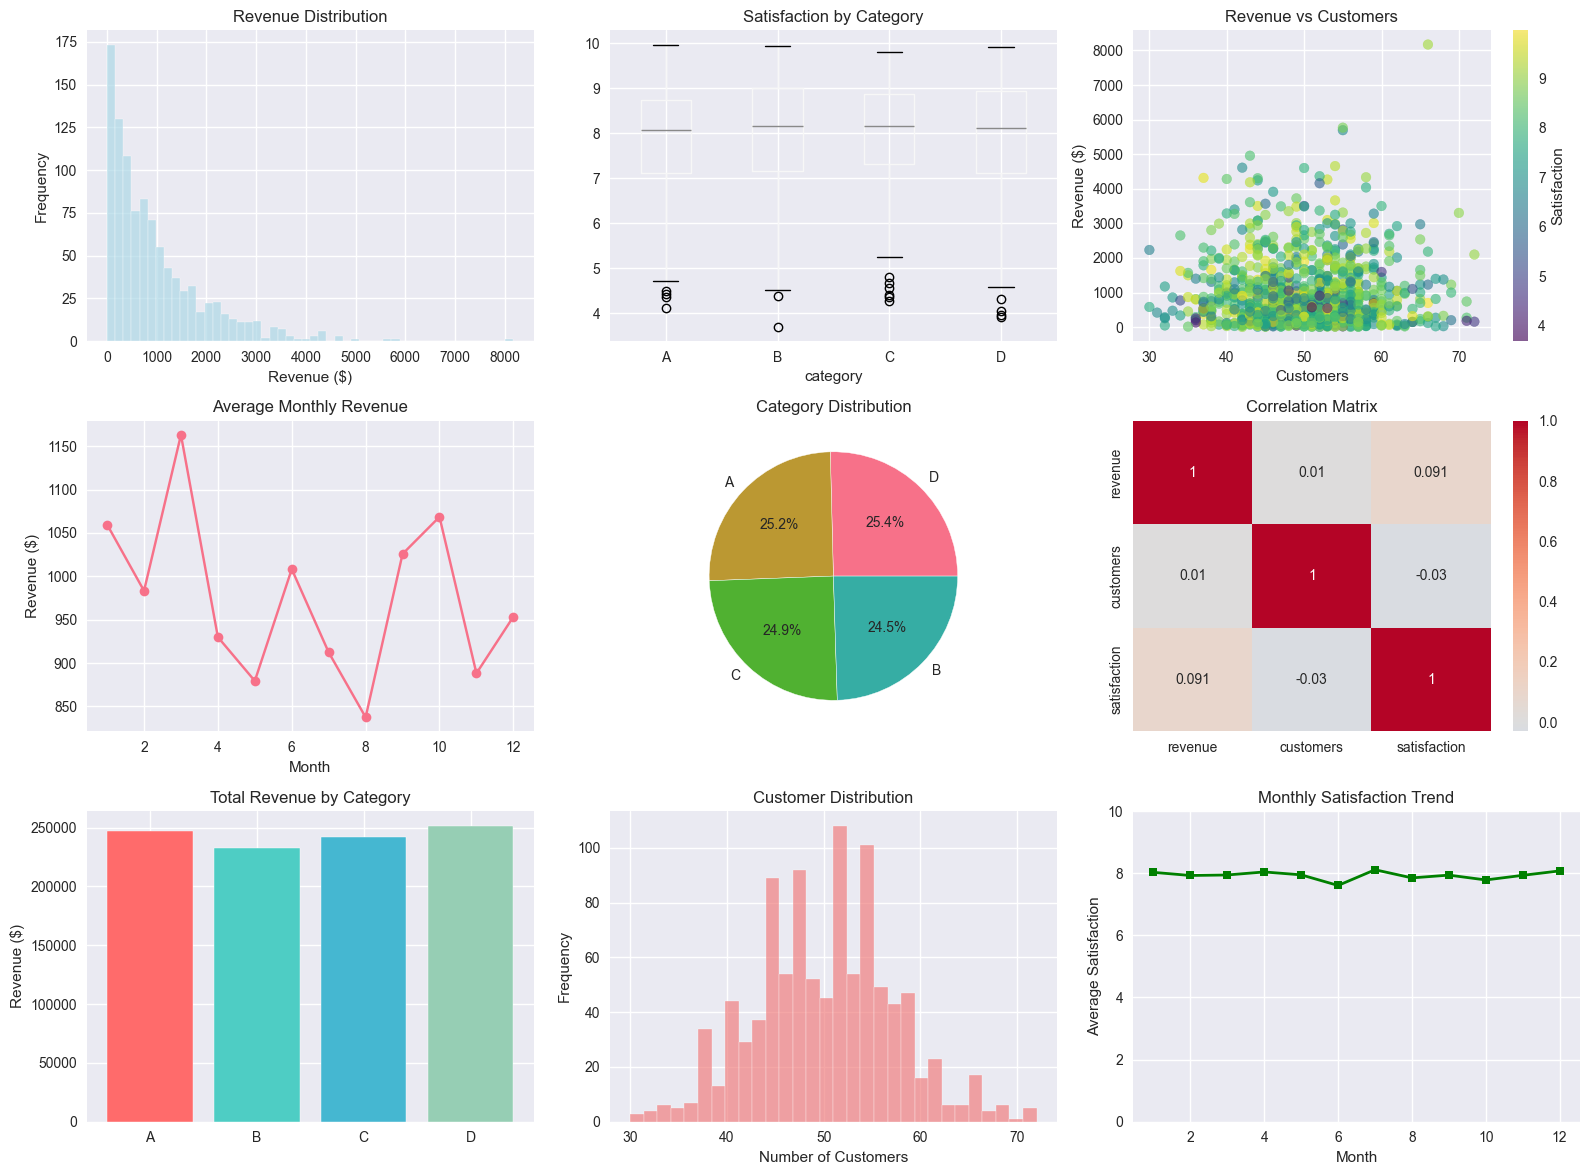

In [2]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(16, 12))

# Revenue distribution
ax1 = plt.subplot(3, 3, 1)
plt.hist(df['revenue'], bins=50, alpha=0.7, color='lightblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')

# Customer satisfaction by category
ax2 = plt.subplot(3, 3, 2)
df.boxplot(column='satisfaction', by='category', ax=ax2)
plt.title('Satisfaction by Category')
plt.suptitle('')

# Revenue vs Customers scatter
ax3 = plt.subplot(3, 3, 3)
scatter = plt.scatter(df['customers'], df['revenue'], c=df['satisfaction'], 
                     cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Satisfaction')
plt.xlabel('Customers')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs Customers')

# Monthly trends
ax4 = plt.subplot(3, 3, 4)
monthly_stats = df.groupby('month').agg({
    'revenue': 'mean',
    'customers': 'mean',
    'satisfaction': 'mean'
})
monthly_stats['revenue'].plot(kind='line', marker='o', ax=ax4)
plt.title('Average Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')

# Category distribution
ax5 = plt.subplot(3, 3, 5)
category_counts = df['category'].value_counts()
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')

# Correlation heatmap
ax6 = plt.subplot(3, 3, 6)
numeric_cols = ['revenue', 'customers', 'satisfaction']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, ax=ax6)
plt.title('Correlation Matrix')

# Revenue by category
ax7 = plt.subplot(3, 3, 7)
category_revenue = df.groupby('category')['revenue'].sum()
bars = plt.bar(category_revenue.index, category_revenue.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Total Revenue by Category')
plt.ylabel('Revenue ($)')

# Customer distribution
ax8 = plt.subplot(3, 3, 8)
plt.hist(df['customers'], bins=30, alpha=0.7, color='lightcoral')
plt.title('Customer Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')

# Satisfaction trend
ax9 = plt.subplot(3, 3, 9)
monthly_satisfaction = df.groupby('month')['satisfaction'].mean()
plt.plot(monthly_satisfaction.index, monthly_satisfaction.values, 
         marker='s', linewidth=2, markersize=6, color='green')
plt.title('Monthly Satisfaction Trend')
plt.xlabel('Month')
plt.ylabel('Average Satisfaction')
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

In [3]:
# Summary statistics table
print("\n=== DASHBOARD SUMMARY ===")
print(f"Total Revenue: ${df['revenue'].sum():,.2f}")
print(f"Average Revenue: ${df['revenue'].mean():,.2f}")
print(f"Total Customers: {df['customers'].sum():,}")
print(f"Average Satisfaction: {df['satisfaction'].mean():.2f}/10")

print("\nTop Performing Categories:")
category_performance = df.groupby('category').agg({
    'revenue': 'sum',
    'customers': 'sum',
    'satisfaction': 'mean'
}).round(2)
category_performance = category_performance.sort_values('revenue', ascending=False)
print(category_performance)


=== DASHBOARD SUMMARY ===
Total Revenue: $972,505.95
Average Revenue: $972.51
Total Customers: 50,070
Average Satisfaction: 7.93/10

Top Performing Categories:
            revenue  customers  satisfaction
category                                    
D         251402.46      12667          7.90
A         246633.91      12743          7.87
C         241849.17      12398          8.01
B         232620.41      12262          7.96
